In [1]:
import scipy
import numpy as np
import mne
import matplotlib.pyplot as plt
import pickle
from src.data import vardefine as v

In [3]:
Chosen_set_dir = "data/processed/25.0sec_overlap0.5_fp1"

# read metadata
loaded_metadata = None
with open(Chosen_set_dir + "/metadata.pkl", 'rb') as file:
    loaded_metadata = pickle.load(file)

dataset = []
for subject_idx, subject_id in enumerate(loaded_metadata['subjects']):
    dataset.append(mne.read_epochs(Chosen_set_dir + f'/sub{subject_id}_epo.fif', verbose = False))

In [4]:
from src.features import feature_extractor as fe

e:\4.MachineLearning_Project\StressDetector-EEG\venv\lib\site-packages\mne_features\utils.py:21: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @nb.jit()


In [9]:
ica = mne.preprocessing.ICA(n_components=15, max_iter=10000, random_state=97)
ica.fit(test)

Fitting ICA to data using 32 channels (please be patient, this may take a while)
Selecting by number: 15 components
Fitting ICA took 0.1s.


Method,fastica
Fit,45 iterations on epochs (3200 samples)
ICA components,15
Available PCA components,32
Channel types,eeg
ICA components marked for exclusion,—


In [10]:
test

Number of events,1
Events,High Stress: 1
Time range,0.000 – 24.992 s
Baseline,off


Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated


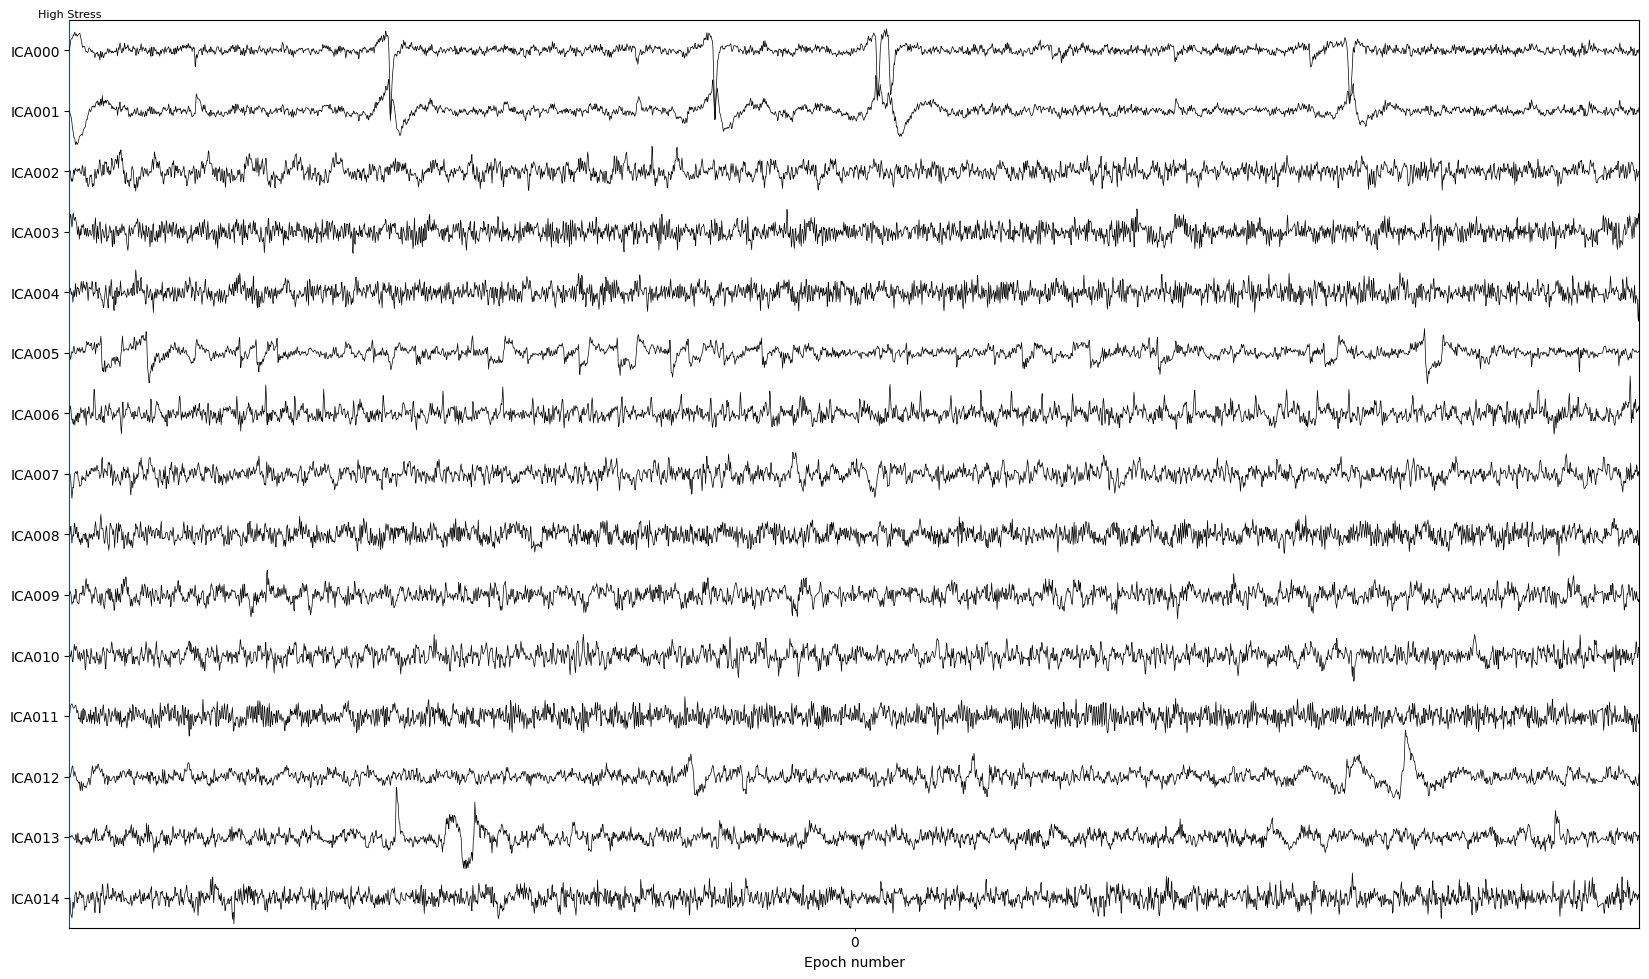

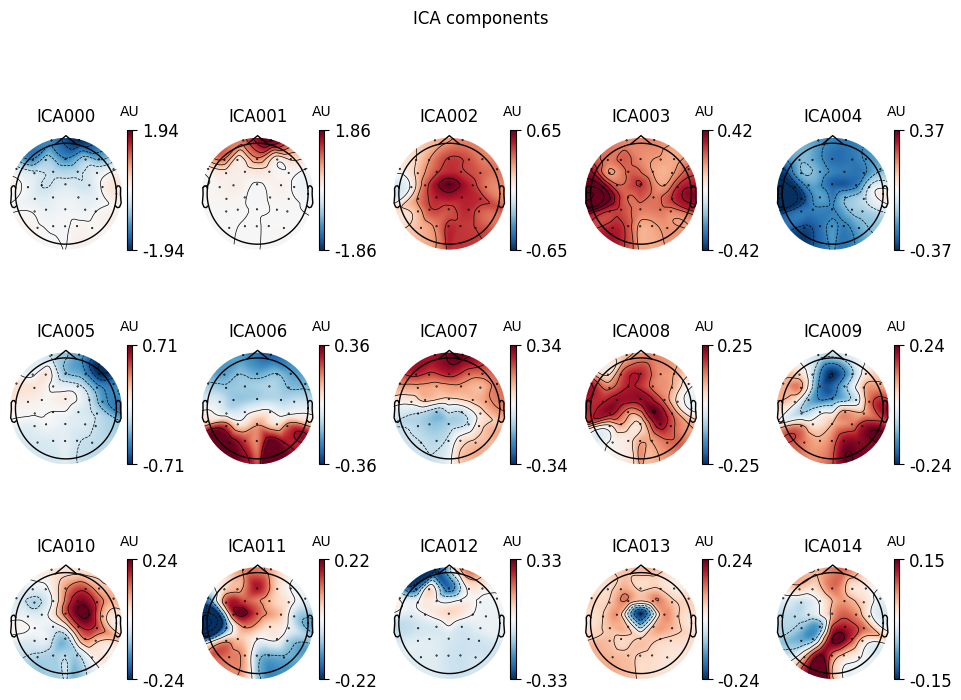

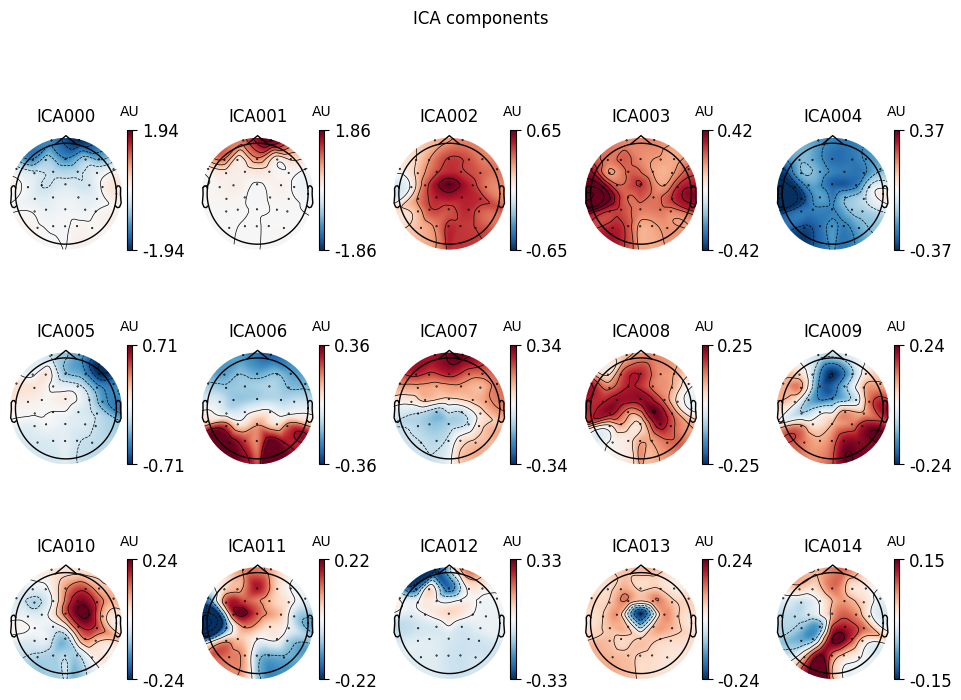

In [11]:
ica.plot_sources(test, title=f'ICA components ', show_scrollbars=False)
ica.plot_components(colorbar=True, reject='auto')

In [27]:
test.average(picks='eeg')

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


<Evoked | 'High Stress' (average, N=1), 0 – 24.992 s, baseline off, 32 ch, ~851 kB>

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Applying ICA to Evoked instance
    Transforming to ICA space (15 components)
    Zeroing out 8 ICA components
    Projecting back using 32 PCA components


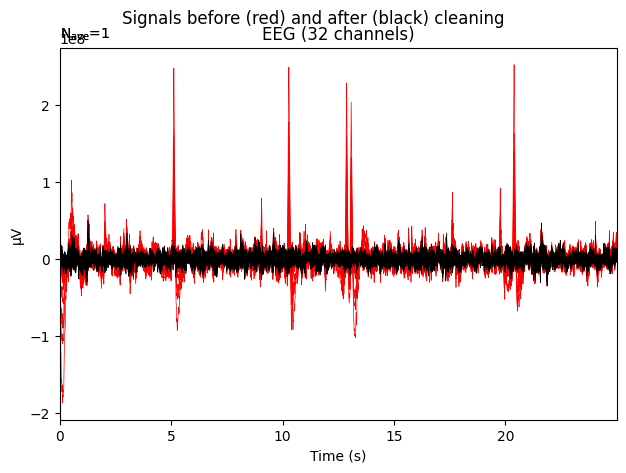

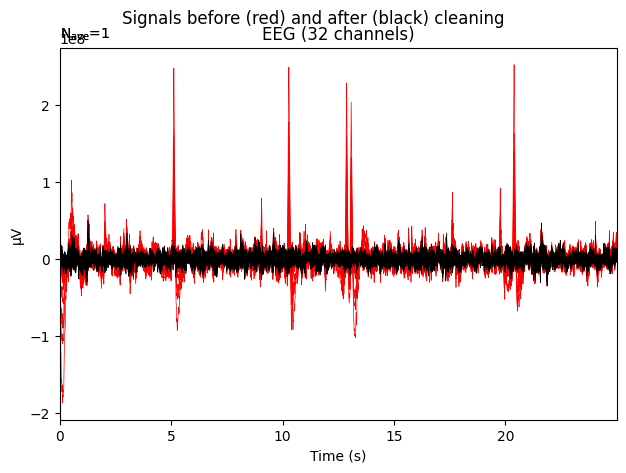

In [30]:
ica.plot_overlay(test.average(picks='eeg'), exclude=[0,1,2,4,6,9,10,14], picks='eeg')